In [117]:
import numpy as np
import pandas as pd


In [118]:
ratings = pd.read_csv("IMDBdatasets/title.ratings.tsv", sep="\t")

In [119]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2110
1,tt0000002,5.6,284
2,tt0000003,6.5,2138
3,tt0000004,5.3,182
4,tt0000005,6.2,2866


In [120]:
ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [121]:
ratings.loc[ratings["tconst"] == "tt0944947"]

,tconst,averageRating,numVotes
450466,tt0944947,9.2,2379409


In [122]:
ratings_new = ratings.loc[(ratings["numVotes"] > 5000) & (ratings["averageRating"] > 6.5)]


In [123]:
ratings_new

,tconst,averageRating,numVotes
9,tt0000010,6.8,7797
11,tt0000012,7.4,13240
13,tt0000014,7.1,6030
300,tt0000417,8.1,57497
310,tt0000439,7.3,21554
...,...,...,...
1514788,tt9906260,9.7,139812
1514959,tt9913012,7.8,5180
1514960,tt9913014,8.1,5046
1514961,tt9913018,8.8,5372


In [124]:
ratings_new.loc[ratings_new["tconst"] == "tt0944947"]

,tconst,averageRating,numVotes
450466,tt0944947,9.2,2379409


In [125]:
basics = pd.read_csv("IMDBdatasets/title.basics.tsv", sep="\t")

C:\Users\nithi\AppData\Local\Temp\ipykernel_11076\3250224482.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv("IMDBdatasets/title.basics.tsv", sep="\t")


In [126]:
basics["startYear"] = basics["startYear"].replace("\\N", np.nan)
basics = basics.dropna(subset=["startYear"])
basics["startYear"] = basics["startYear"].astype("Int64")
print(basics.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9911035 entries, 0 to 11329467
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       Int64 
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: Int64(1), object(8)
memory usage: 765.6+ MB
None


In [127]:
basics = basics.loc[(basics["titleType"].isin(["movie", "tvSeries"]))]

In [128]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
...,...,...,...,...,...,...,...,...,...
11329385,tt9916678,tvSeries,Acelerados,Acelerados,0,2019,\N,\N,Comedy
11329386,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
11329398,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
11329408,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama


In [129]:
ratings_new = ratings_new.loc[ratings_new["tconst"].isin(basics["tconst"])]

In [130]:
basics_selected = basics[["tconst", "titleType", "primaryTitle", "genres", "startYear"]]
basics_selected

,tconst,titleType,primaryTitle,genres,startYear
8,tt0000009,movie,Miss Jerry,Romance,1894
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,"Documentary,News,Sport",1897
498,tt0000502,movie,Bohemios,\N,1905
570,tt0000574,movie,The Story of the Kelly Gang,"Action,Adventure,Biography",1906
587,tt0000591,movie,The Prodigal Son,Drama,1907
...,...,...,...,...,...
11329385,tt9916678,tvSeries,Acelerados,Comedy,2019
11329386,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,Documentary,2007
11329398,tt9916706,movie,Dankyavar Danka,Comedy,2013
11329408,tt9916730,movie,6 Gunn,Drama,2017


In [131]:
ratings_selected = ratings_new[["tconst", "averageRating"]]

In [132]:
ratings_selected

,tconst,averageRating
1999,tt0006206,7.3
2184,tt0006864,7.7
3005,tt0009968,7.2
3123,tt0010323,8.0
3347,tt0011130,6.9
...,...,...
1513911,tt9883996,6.9
1514260,tt9892936,8.6
1514542,tt9899340,7.7
1514573,tt9900092,7.3


In [133]:
ratings_selected.loc[ratings_selected["tconst"] == "tt0944947"]

,tconst,averageRating
450466,tt0944947,9.2


In [134]:
combined_df = ratings_selected.merge(basics_selected, on="tconst", how="inner")
combined_df

,tconst,averageRating,titleType,primaryTitle,genres,startYear
0,tt0006206,7.3,movie,Les Vampires,"Action,Adventure,Crime",1915
1,tt0006864,7.7,movie,Intolerance,"Drama,History",1916
2,tt0009968,7.2,movie,Broken Blossoms,"Drama,Romance",1919
3,tt0010323,8.0,movie,The Cabinet of Dr. Caligari,"Horror,Mystery,Thriller",1920
4,tt0011130,6.9,movie,Dr. Jekyll and Mr. Hyde,"Drama,Horror,Sci-Fi",1920
...,...,...,...,...,...,...
12133,tt9883996,6.9,movie,Dream Horse,"Biography,Comedy,Drama",2020
12134,tt9892936,8.6,tvSeries,One Hundred Years of Solitude,"Drama,Fantasy,History",2024
12135,tt9899340,7.7,tvSeries,Her Private Life,"Comedy,Drama,Romance",2019
12136,tt9900092,7.3,tvSeries,Motherland: Fort Salem,"Drama,Fantasy,Sci-Fi",2020


In [135]:
combined_df["genres"] = combined_df["genres"].apply(
    lambda x: x.split(",") if x != r"\N" else []
)

In [136]:
combined_df = combined_df.rename(
    columns={
        "tconst": "id",
        "titleType": "type",
        "averageRating": "rating",
        "primaryTitle": "title",
        "genres": "genres",
        "startYear": "year"
    }
)[["id", "title", "type", "rating", "year","genres"]]
combined_df

,id,title,type,rating,year,genres
0,tt0006206,Les Vampires,movie,7.3,1915,"[Action, Adventure, Crime]"
1,tt0006864,Intolerance,movie,7.7,1916,"[Drama, History]"
2,tt0009968,Broken Blossoms,movie,7.2,1919,"[Drama, Romance]"
3,tt0010323,The Cabinet of Dr. Caligari,movie,8.0,1920,"[Horror, Mystery, Thriller]"
4,tt0011130,Dr. Jekyll and Mr. Hyde,movie,6.9,1920,"[Drama, Horror, Sci-Fi]"
...,...,...,...,...,...,...
12133,tt9883996,Dream Horse,movie,6.9,2020,"[Biography, Comedy, Drama]"
12134,tt9892936,One Hundred Years of Solitude,tvSeries,8.6,2024,"[Drama, Fantasy, History]"
12135,tt9899340,Her Private Life,tvSeries,7.7,2019,"[Comedy, Drama, Romance]"
12136,tt9900092,Motherland: Fort Salem,tvSeries,7.3,2020,"[Drama, Fantasy, Sci-Fi]"


In [137]:
names_df = pd.read_csv("IMDBdatasets/name.basics.tsv", sep="\t")

In [138]:
names_df["knownForTitles"] = names_df["knownForTitles"].astype(str).str.split(",")
names_expanded = names_df.explode("knownForTitles")


In [139]:
merged_df = combined_df.merge(
    names_expanded, left_on="id", right_on="knownForTitles", how="left"
)

In [140]:
combined_df["genres"] = combined_df["genres"].apply(tuple)

In [141]:
merged_df = combined_df.merge(
    names_expanded, left_on="id", right_on="knownForTitles", how="left"
)

In [142]:
merged_df

,id,title,type,rating,year,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0006206,Les Vampires,movie,7.3,1915,"(Action, Adventure, Crime)",nm0004592,Robert Israel,1963,\N,"composer,music_department,producer",tt0006206
1,tt0006206,Les Vampires,movie,7.3,1915,"(Action, Adventure, Crime)",nm0043923,Jean Aymé,1876,1963,"actor,director,archive_footage",tt0006206
2,tt0006206,Les Vampires,movie,7.3,1915,"(Action, Adventure, Crime)",nm0218003,Suzanne Delvé,1892,1986,actress,tt0006206
3,tt0006206,Les Vampires,movie,7.3,1915,"(Action, Adventure, Crime)",nm0249381,Miss Édith,\N,\N,actress,tt0006206
4,tt0006206,Les Vampires,movie,7.3,1915,"(Action, Adventure, Crime)",nm0275421,Louis Feuillade,1873,1925,"director,writer,producer",tt0006206
...,...,...,...,...,...,...,...,...,...,...,...,...
1750101,tt9900782,Kaithi,movie,8.4,2019,"(Action, Crime, Thriller)",nm9120709,Kailash Sundaresan,\N,\N,camera_department,tt9900782
1750102,tt9900782,Kaithi,movie,8.4,2019,"(Action, Crime, Thriller)",nm9120710,Pavithran Venkatachalam,\N,\N,camera_department,tt9900782
1750103,tt9900782,Kaithi,movie,8.4,2019,"(Action, Crime, Thriller)",nm9904860,R. Kathiravan,\N,\N,"producer,executive",tt9900782
1750104,tt9900782,Kaithi,movie,8.4,2019,"(Action, Crime, Thriller)",nm9946568,Ashish Joseph,\N,\N,"editorial_department,editor,director",tt9900782


In [143]:
merged_df = (
    merged_df.groupby(["id", "title", "type", "rating", "year", "genres"])["nconst"]
    .apply(lambda x: list(x)[:4])  # Limit to 4 actors
    .reset_index()
)

In [144]:
merged_df

,id,title,type,rating,year,genres,nconst
0,tt0006206,Les Vampires,movie,7.3,1915,"(Action, Adventure, Crime)","[nm0004592, nm0043923, nm0218003, nm0249381]"
1,tt0006864,Intolerance,movie,7.7,1916,"(Drama, History)","[nm0000428, nm0005658, nm0071758, nm0178270]"
2,tt0009968,Broken Blossoms,movie,7.2,1919,"(Drama, Romance)","[nm0000428, nm0005658, nm0081361, nm0121885]"
3,tt0010323,The Cabinet of Dr. Caligari,movie,8.0,1920,"(Horror, Mystery, Thriller)","[nm0005736, nm0005959, nm0031350, nm0110640]"
4,tt0011130,Dr. Jekyll and Mr. Hyde,movie,6.9,1920,"(Drama, Horror, Sci-Fi)","[nm0005818, nm0073238, nm0167247, nm0403582]"
...,...,...,...,...,...,...,...
12133,tt9883996,Dream Horse,movie,6.9,2020,"(Biography, Comedy, Drama)","[nm0049753, nm0236991, nm0275303, nm0803995]"
12134,tt9892936,One Hundred Years of Solitude,tvSeries,8.6,2024,"(Drama, Fantasy, History)","[nm10026802, nm10297262, nm10470056, nm1067790]"
12135,tt9899340,Her Private Life,tvSeries,7.7,2019,"(Comedy, Drama, Romance)","[nm12368755, nm12570861, nm12579353, nm12579374]"
12136,tt9900092,Motherland: Fort Salem,tvSeries,7.3,2020,"(Drama, Fantasy, Sci-Fi)","[nm0088193, nm0099613, nm0210686, nm0232384]"


In [145]:
merged_df.rename(columns={"nconst": "actors"}, inplace=True)

In [146]:
merged_df

,id,title,type,rating,year,genres,actors
0,tt0006206,Les Vampires,movie,7.3,1915,"(Action, Adventure, Crime)","[nm0004592, nm0043923, nm0218003, nm0249381]"
1,tt0006864,Intolerance,movie,7.7,1916,"(Drama, History)","[nm0000428, nm0005658, nm0071758, nm0178270]"
2,tt0009968,Broken Blossoms,movie,7.2,1919,"(Drama, Romance)","[nm0000428, nm0005658, nm0081361, nm0121885]"
3,tt0010323,The Cabinet of Dr. Caligari,movie,8.0,1920,"(Horror, Mystery, Thriller)","[nm0005736, nm0005959, nm0031350, nm0110640]"
4,tt0011130,Dr. Jekyll and Mr. Hyde,movie,6.9,1920,"(Drama, Horror, Sci-Fi)","[nm0005818, nm0073238, nm0167247, nm0403582]"
...,...,...,...,...,...,...,...
12133,tt9883996,Dream Horse,movie,6.9,2020,"(Biography, Comedy, Drama)","[nm0049753, nm0236991, nm0275303, nm0803995]"
12134,tt9892936,One Hundred Years of Solitude,tvSeries,8.6,2024,"(Drama, Fantasy, History)","[nm10026802, nm10297262, nm10470056, nm1067790]"
12135,tt9899340,Her Private Life,tvSeries,7.7,2019,"(Comedy, Drama, Romance)","[nm12368755, nm12570861, nm12579353, nm12579374]"
12136,tt9900092,Motherland: Fort Salem,tvSeries,7.3,2020,"(Drama, Fantasy, Sci-Fi)","[nm0088193, nm0099613, nm0210686, nm0232384]"


In [147]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

In [148]:
# 🔹 Ensure 'actors' column is a list of strings & remove NaN
merged_df["actors"] = merged_df["actors"].apply(
    lambda x: [str(i) for i in x] if isinstance(x, list) else []
)

# 🔹 Encode 'type' column (single-label)
label_enc_type = LabelEncoder()
merged_df["type"] = label_enc_type.fit_transform(merged_df["type"])

# 🔹 Encode 'genres' using MultiLabelBinarizer
mlb_genres = MultiLabelBinarizer()
genres_encoded = mlb_genres.fit_transform(merged_df["genres"].apply(list))
genres_df = pd.DataFrame(genres_encoded, columns=mlb_genres.classes_)

# 🔹 Encode 'actors' using MultiLabelBinarizer


In [149]:
mlb_actors = MultiLabelBinarizer()
actors_encoded = mlb_actors.fit_transform(merged_df["actors"])
actors_df = pd.DataFrame(actors_encoded, columns=mlb_actors.classes_)

# 🔹 Merge encoded genres & actors back
merged_df = pd.concat([merged_df, genres_df, actors_df], axis=1)

# 🔹 Drop original categorical columns
merged_df.drop(columns=["genres", "actors"], inplace=True)

print(merged_df.head())

          id                        title  type  rating  year  Action  \
0  tt0006206                 Les Vampires     0     7.3  1915       1   
1  tt0006864                  Intolerance     0     7.7  1916       0   
2  tt0009968              Broken Blossoms     0     7.2  1919       0   
3  tt0010323  The Cabinet of Dr. Caligari     0     8.0  1920       0   
4  tt0011130      Dr. Jekyll and Mr. Hyde     0     6.9  1920       0   

   Adventure  Animation  Biography  Comedy  ...  nm8589837  nm8660690  \
0          1          0          0       0  ...          0          0   
1          0          0          0       0  ...          0          0   
2          0          0          0       0  ...          0          0   
3          0          0          0       0  ...          0          0   
4          0          0          0       0  ...          0          0   

   nm8874716  nm9352650  nm9357947  nm9665676  nm9772930  nm9819854  \
0          0          0          0          0      

In [150]:
merged_df

,id,title,type,rating,year,Action,Adventure,Animation,Biography,Comedy,...,nm8589837,nm8660690,nm8874716,nm9352650,nm9357947,nm9665676,nm9772930,nm9819854,nm9981765,nm9981766
0,tt0006206,Les Vampires,0,7.3,1915,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0006864,Intolerance,0,7.7,1916,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0009968,Broken Blossoms,0,7.2,1919,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0010323,The Cabinet of Dr. Caligari,0,8.0,1920,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0011130,Dr. Jekyll and Mr. Hyde,0,6.9,1920,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,tt9883996,Dream Horse,0,6.9,2020,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
12134,tt9892936,One Hundred Years of Solitude,1,8.6,2024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12135,tt9899340,Her Private Life,1,7.7,2019,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12136,tt9900092,Motherland: Fort Salem,1,7.3,2020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
actor_columns = [col for col in merged_df.columns if col.startswith("nm")]

In [152]:
actor_columns

['nm0000001',
 'nm0000002',
 'nm0000003',
 'nm0000004',
 'nm0000005',
 'nm0000006',
 'nm0000007',
 'nm0000008',
 'nm0000009',
 'nm0000010',
 'nm0000011',
 'nm0000012',
 'nm0000013',
 'nm0000014',
 'nm0000015',
 'nm0000016',
 'nm0000017',
 'nm0000018',
 'nm0000019',
 'nm0000020',
 'nm0000021',
 'nm0000022',
 'nm0000023',
 'nm0000024',
 'nm0000025',
 'nm0000026',
 'nm0000027',
 'nm0000028',
 'nm0000030',
 'nm0000031',
 'nm0000032',
 'nm0000033',
 'nm0000034',
 'nm0000035',
 'nm0000036',
 'nm0000037',
 'nm0000038',
 'nm0000039',
 'nm0000040',
 'nm0000041',
 'nm0000042',
 'nm0000043',
 'nm0000044',
 'nm0000045',
 'nm0000046',
 'nm0000047',
 'nm0000048',
 'nm0000049',
 'nm0000050',
 'nm0000051',
 'nm0000052',
 'nm0000053',
 'nm0000054',
 'nm0000055',
 'nm0000056',
 'nm0000057',
 'nm0000058',
 'nm0000059',
 'nm0000060',
 'nm0000061',
 'nm0000063',
 'nm0000064',
 'nm0000065',
 'nm0000066',
 'nm0000067',
 'nm0000068',
 'nm0000069',
 'nm0000070',
 'nm0000071',
 'nm0000072',
 'nm0000073',
 'nm00

In [153]:
X_actors = merged_df[actor_columns]
X_actors

,nm0000001,nm0000002,nm0000003,nm0000004,nm0000005,nm0000006,nm0000007,nm0000008,nm0000009,nm0000010,...,nm8589837,nm8660690,nm8874716,nm9352650,nm9357947,nm9665676,nm9772930,nm9819854,nm9981765,nm9981766
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=50)  # Reduce to 50 features before t-SNE
X_pca = pca.fit_transform(X_actors)





In [156]:
X_pca.shape

(12138, 50)

In [158]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

In [159]:
X_tsne

array([[ 16.338722, -81.04073 ],
       [-33.586502, -31.95685 ],
       [-33.586433, -31.955656],
       ...,
       [-51.68713 ,  40.18032 ],
       [ -4.369071, -66.05654 ],
       [ 18.793552,   5.895516]], dtype=float32)

In [ ]:
X_tsne

In [160]:
merged_df["actors_tsne_1"] = X_tsne[:, 0]
merged_df["actors_tsne_2"] = X_tsne[:, 1]



In [163]:
merged_df.drop(columns=actor_columns, inplace=True)

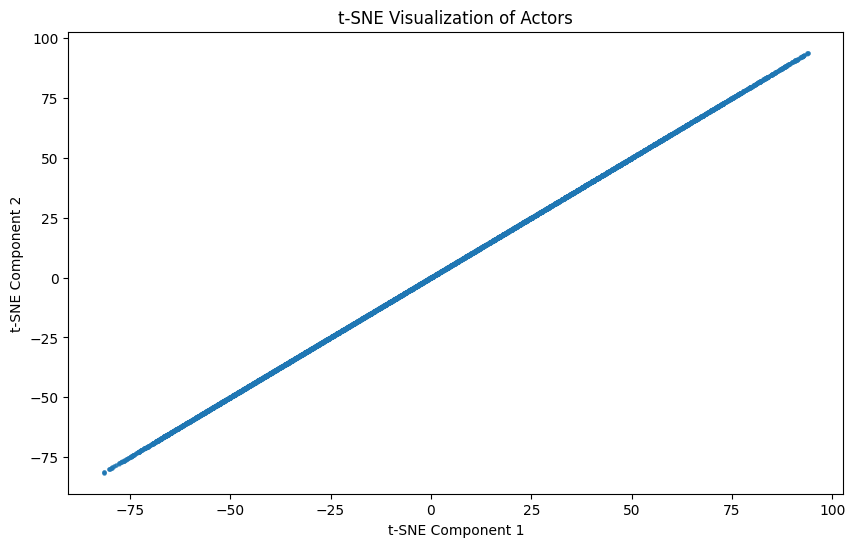

In [161]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["actors_tsne_1"], merged_df["actors_tsne_1"], alpha=0.5, s=5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Actors")
plt.show()

In [164]:
merged_df

,id,title,type,rating,year,Action,Adventure,Animation,Biography,Comedy,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan,actors_tsne_1,actors_tsne_2
0,tt0006206,Les Vampires,0,7.3,1915,1,1,0,0,0,...,0,0,0,0,0,0,0,0,16.338722,-81.040733
1,tt0006864,Intolerance,0,7.7,1916,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-33.586502,-31.956850
2,tt0009968,Broken Blossoms,0,7.2,1919,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-33.586433,-31.955656
3,tt0010323,The Cabinet of Dr. Caligari,0,8.0,1920,0,0,0,0,0,...,0,0,0,0,1,0,0,0,7.446022,43.534718
4,tt0011130,Dr. Jekyll and Mr. Hyde,0,6.9,1920,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.223243,-25.448393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,tt9883996,Dream Horse,0,6.9,2020,0,0,0,1,1,...,0,0,0,0,0,0,0,0,22.318020,58.538280
12134,tt9892936,One Hundred Years of Solitude,1,8.6,2024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-36.393513,19.640562
12135,tt9899340,Her Private Life,1,7.7,2019,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-51.687130,40.180321
12136,tt9900092,Motherland: Fort Salem,1,7.3,2020,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-4.369071,-66.056541


In [165]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

merged_df["actors_tsne_1"] = scaler.fit_transform(merged_df[["actors_tsne_1"]])
merged_df["actors_tsne_2"] = scaler.fit_transform(merged_df[["actors_tsne_2"]])

In [166]:
merged_df["year"] = scaler.fit_transform(merged_df[["year"]])

In [167]:
merged_df["rating"] = scaler.fit_transform(merged_df[["rating"]])

In [168]:
merged_df

,id,title,type,rating,year,Action,Adventure,Animation,Biography,Comedy,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan,actors_tsne_1,actors_tsne_2
0,tt0006206,Les Vampires,0,0.21875,0.000000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.557611,0.087363
1,tt0006864,Intolerance,0,0.34375,0.009174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.273229,0.366655
2,tt0009968,Broken Blossoms,0,0.18750,0.036697,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.273230,0.366661
3,tt0010323,The Cabinet of Dr. Caligari,0,0.43750,0.045872,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.506957,0.796208
4,tt0011130,Dr. Jekyll and Mr. Hyde,0,0.09375,0.045872,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.465815,0.403688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,tt9883996,Dream Horse,0,0.09375,0.963303,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.591671,0.881580
12134,tt9892936,One Hundred Years of Solitude,1,0.62500,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.257240,0.660248
12135,tt9899340,Her Private Life,1,0.34375,0.954128,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.170125,0.777121
12136,tt9900092,Motherland: Fort Salem,1,0.21875,0.963303,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.439657,0.172624


In [64]:
merged_df

,id,title,type,rating,year,Action,Adventure,Animation,Biography,Comedy,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan,actors_tsne_1,actors_tsne_2
0,tt0006206,Les Vampires,0,0.21875,0.000000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.337890,0.724434
1,tt0006864,Intolerance,0,0.34375,0.009174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.323136,0.584891
2,tt0009968,Broken Blossoms,0,0.18750,0.036697,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.323136,0.584891
3,tt0010323,The Cabinet of Dr. Caligari,0,0.43750,0.045872,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.521637,0.613647
4,tt0011130,Dr. Jekyll and Mr. Hyde,0,0.09375,0.045872,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.458317,0.693392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,tt9883996,Dream Horse,0,0.09375,0.963303,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.497784,0.664556
12134,tt9892936,One Hundred Years of Solitude,1,0.62500,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.468699,0.699612
12135,tt9899340,Her Private Life,1,0.34375,0.954128,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.460830,0.700771
12136,tt9900092,Motherland: Fort Salem,1,0.21875,0.963303,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.332912,0.631139


In [65]:
merged_df.columns

Index(['id', 'title', 'type', 'rating', 'year', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western',
       'nan', 'actors_tsne_1', 'actors_tsne_2'],
      dtype='object')

In [169]:
merged_df = merged_df[
    [
        "id",
        "title",
        "rating",
        "year",
        "actors_tsne_1",
        "actors_tsne_2",
        "type",
        "Action",
        "Adventure",
        "Animation",
        "Biography",
        "Comedy",
        "Crime",
        "Documentary",
        "Drama",
        "Family",
        "Fantasy",
        "Film-Noir",
        "Game-Show",
        "History",
        "Horror",
        "Music",
        "Musical",
        "Mystery",
        "News",
        "Reality-TV",
        "Romance",
        "Sci-Fi",
        "Short",
        "Sport",
        "Talk-Show",
        "Thriller",
        "War",
        "Western",
        "nan",
    ]
]
merged_df

,id,title,rating,year,actors_tsne_1,actors_tsne_2,type,Action,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
0,tt0006206,Les Vampires,0.21875,0.000000,0.557611,0.087363,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0006864,Intolerance,0.34375,0.009174,0.273229,0.366655,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0009968,Broken Blossoms,0.18750,0.036697,0.273230,0.366661,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,tt0010323,The Cabinet of Dr. Caligari,0.43750,0.045872,0.506957,0.796208,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,tt0011130,Dr. Jekyll and Mr. Hyde,0.09375,0.045872,0.465815,0.403688,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12133,tt9883996,Dream Horse,0.09375,0.963303,0.591671,0.881580,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12134,tt9892936,One Hundred Years of Solitude,0.62500,1.000000,0.257240,0.660248,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12135,tt9899340,Her Private Life,0.34375,0.954128,0.170125,0.777121,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12136,tt9900092,Motherland: Fort Salem,0.21875,0.963303,0.439657,0.172624,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [171]:
merged_df['nan'].unique()

array([0, 1])

In [367]:
from scipy.spatial.distance import euclidean, hamming


def weighted_distance(movie1, movie2):
    movie1 = movie1.ravel()  # Ensure it's a 1D array
    movie2 = movie2.ravel()  # Ensure it's a 1D array

    actors_dist = euclidean(movie1[4:6], movie2[4:6]) * 1.6
    years_dist = euclidean([movie1[3]], [movie2[3]]) * 0.03
    rating_dist = euclidean([movie1[2]], [movie2[2]]) * 0.45
    type_dist = hamming([movie1[6]], [movie2[6]]) * 1.05
    gen_dist = hamming(movie1[7:], movie2[7:]) * 0.45

    return actors_dist + years_dist + rating_dist + type_dist + gen_dist

In [368]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=6, metric=weighted_distance)
knn.fit(merged_df.iloc[:, 2:].to_numpy())

NearestNeighbors(metric=<function weighted_distance at 0x000001EC4FEA3380>,
                 n_neighbors=6)

In [369]:
def recomment(index):
    distances, indices = knn.kneighbors([merged_df.iloc[index, 2:].to_numpy()])
    recommended_indices = indices[0][1:]
    print(f'Recommendations for {merged_df["title"][index]} :')
    for rec in recommended_indices:
        print(merged_df["title"][rec])


In [377]:
recomment(12058)

Recommendations for Ala Vaikunthapurramuloo :
Eega
Attarintiki Daredi
Let the Bullets Fly
Mr. India
Ishq


In [376]:
merged_df.loc[merged_df["id"] == "tt9537292"]

,id,title,rating,year,actors_tsne_1,actors_tsne_2,type,Action,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,nan
12058,tt9537292,Ala Vaikunthapurramuloo,0.21875,0.963303,0.263295,0.183208,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
merged_df.to_pickle("processed_movies.pkl")

In [336]:
merged_df.to_csv("processed_movies.csv", index=False)

In [379]:
import pickle

with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)